# *part 1*
### Library Implementation, Initial Test and Validation (XOR Problem)

Training XOR...
Epoch 1/2000, Loss: 2.0000
Epoch 2/2000, Loss: 2.0000
Epoch 3/2000, Loss: 2.0000
Epoch 4/2000, Loss: 2.0000
Epoch 5/2000, Loss: 2.0000
Epoch 6/2000, Loss: 2.0000
Epoch 7/2000, Loss: 2.0000
Epoch 8/2000, Loss: 2.0000
Epoch 9/2000, Loss: 2.0000
Epoch 10/2000, Loss: 2.0000
Epoch 11/2000, Loss: 2.0000
Epoch 12/2000, Loss: 2.0000
Epoch 13/2000, Loss: 2.0000
Epoch 14/2000, Loss: 2.0000
Epoch 15/2000, Loss: 2.0000
Epoch 16/2000, Loss: 2.0000
Epoch 17/2000, Loss: 2.0000
Epoch 18/2000, Loss: 2.0000
Epoch 19/2000, Loss: 2.0000
Epoch 20/2000, Loss: 2.0000
Epoch 21/2000, Loss: 2.0000
Epoch 22/2000, Loss: 2.0000
Epoch 23/2000, Loss: 2.0000
Epoch 24/2000, Loss: 2.0000
Epoch 25/2000, Loss: 2.0000
Epoch 26/2000, Loss: 2.0000
Epoch 27/2000, Loss: 2.0000
Epoch 28/2000, Loss: 2.0000
Epoch 29/2000, Loss: 2.0000
Epoch 30/2000, Loss: 2.0000
Epoch 31/2000, Loss: 2.0000
Epoch 32/2000, Loss: 2.0000
Epoch 33/2000, Loss: 2.0000
Epoch 34/2000, Loss: 2.0000
Epoch 35/2000, Loss: 2.0000
Epoch 36/2000

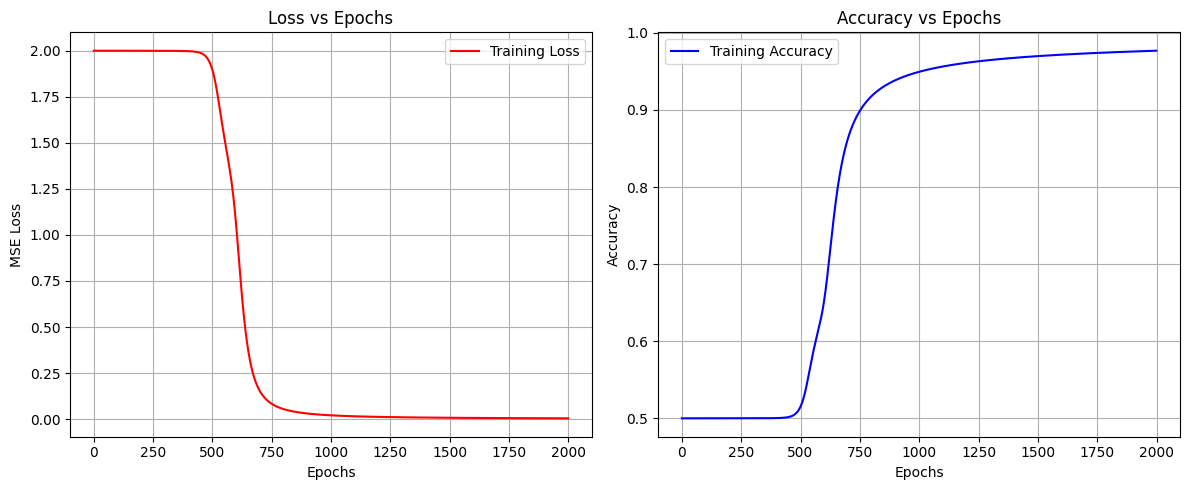

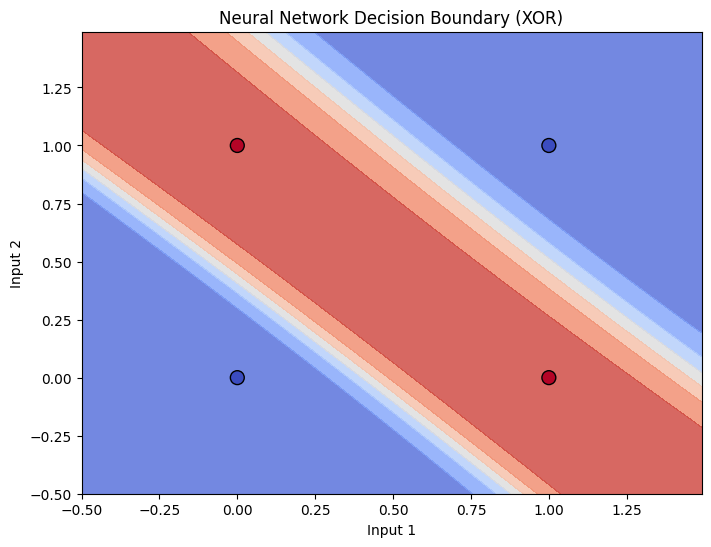


Final Predictions:
Input: [0 0], Pred: 0.0229, Rounded: 0
Input: [0 1], Pred: 0.9764, Rounded: 1
Input: [1 0], Pred: 0.9803, Rounded: 1
Input: [1 1], Pred: 0.0266, Rounded: 0


In [ ]:
# 0. Imports and Setup

import numpy as np
import sys
import os
import matplotlib.pyplot as plt 

# Ensure we can import from the lib folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.network import Network
from lib.layers import Dense
from lib.activations import Tanh, Sigmoid
from lib.losses import mse, mse_prime
from lib.optimizer import SGD
from lib.training_history import plot_performance

def plot_decision_boundary(network, X, Y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions for the entire grid
    Z = network.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm') 
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), edgecolors='k', s=100, cmap='coolwarm')
    plt.title("Neural Network Decision Boundary (XOR)")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()


# 1. Prepare Data (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# 2. Build Architecture 
net = Network()
net.add(Dense(2, 4))
net.add(Tanh())      
net.add(Dense(4, 1))
net.add(Sigmoid())   

# 3. Setup Training 
net.use_loss(mse, mse_prime)
optimizer = SGD(learning_rate=1.0)

# 4. Train
print("Training XOR...")
errors, accuracies = net.train(X, Y, epochs=2000, optimizer=optimizer)

# 5. Plot Performance (Loss/Accuracy)
plot_performance(errors, accuracies)

# 6. Plot Decision Boundary (THE NEW FEATURE)
plot_decision_boundary(net, X, Y)

# 7. Verify Final Predictions
print("\nFinal Predictions:")
predictions = net.predict(X)
for x, p in zip(X, predictions):
    print(f"Input: {x}, Pred: {p[0]:.4f}, Rounded: {round(p[0])}")

# *part 2*

MNIST Loaded: Train shape (5000, 784), Test shape (5000, 784)
Training Autoencoder...
--- Network Architecture Check ---
Layer 0: Weights (784, 128)
Layer 2: Weights (128, 64)
Layer 4: Weights (64, 128)
Layer 6: Weights (128, 784)
Epoch 1/50, Loss: 0.2014
Epoch 2/50, Loss: 0.0824
Epoch 3/50, Loss: 0.0715
Epoch 4/50, Loss: 0.0697
Epoch 5/50, Loss: 0.0687
Epoch 6/50, Loss: 0.0676
Epoch 7/50, Loss: 0.0667
Epoch 8/50, Loss: 0.0656
Epoch 9/50, Loss: 0.0644
Epoch 10/50, Loss: 0.0631
Epoch 11/50, Loss: 0.0617
Epoch 12/50, Loss: 0.0602
Epoch 13/50, Loss: 0.0588
Epoch 14/50, Loss: 0.0572
Epoch 15/50, Loss: 0.0557
Epoch 16/50, Loss: 0.0541
Epoch 17/50, Loss: 0.0527
Epoch 18/50, Loss: 0.0514
Epoch 19/50, Loss: 0.0501
Epoch 20/50, Loss: 0.0490
Epoch 21/50, Loss: 0.0480
Epoch 22/50, Loss: 0.0470
Epoch 23/50, Loss: 0.0461
Epoch 24/50, Loss: 0.0453
Epoch 25/50, Loss: 0.0445
Epoch 26/50, Loss: 0.0438
Epoch 27/50, Loss: 0.0430
Epoch 28/50, Loss: 0.0424
Epoch 29/50, Loss: 0.0417
Epoch 30/50, Loss: 0.041

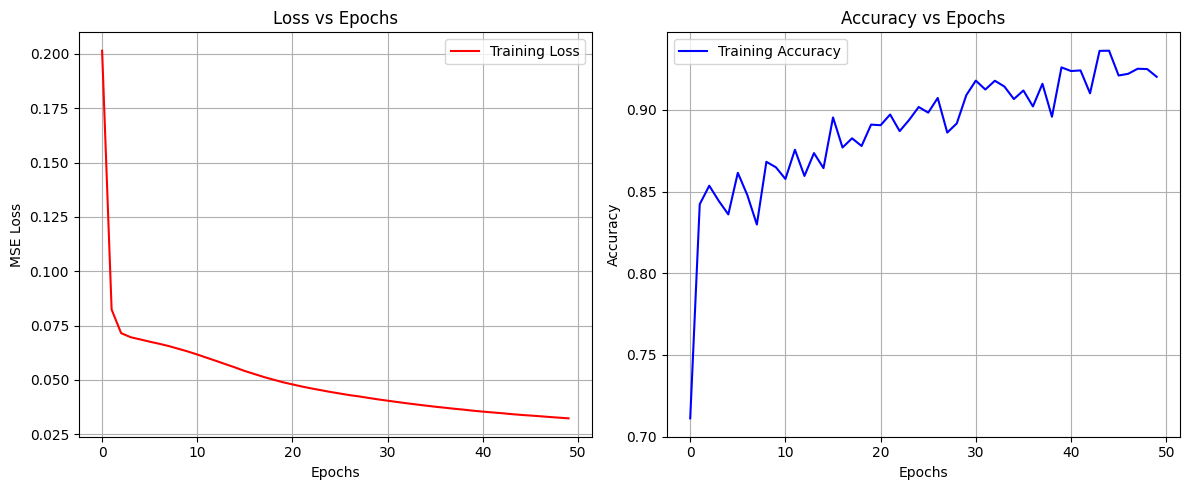

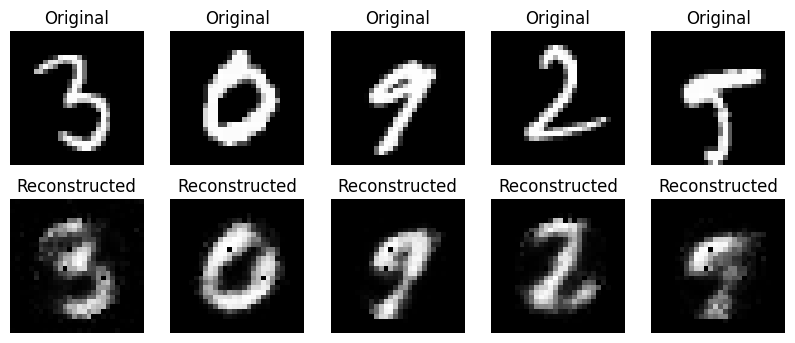

In [7]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# Ensure we can import from lib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.network import Network
from lib.encoder import build_encoder
from lib.decoder import build_decoder
from lib.losses import mse, mse_prime
from lib.optimizer import SGD
from lib.data_loader import load_mnist
from lib.training_history import plot_performance

# 1. Load Data
# We use a limit of 5000 images first to ensure it works quickly.
# Once verified, you can increase this or remove the limit.
x_train, y_train, x_test, y_test = load_mnist(limit=5000)

# 2. Build the Autoencoder
# We create the parts...
encoder = build_encoder(input_size=784, latent_size=64)
decoder = build_decoder(latent_size=64, output_size=784)

# ...and stitch them together into one network
autoencoder = Network()
for layer in encoder.layers:
    autoencoder.add(layer)
for layer in decoder.layers:
    autoencoder.add(layer)

# 3. Setup Training
autoencoder.use_loss(mse, mse_prime)
optimizer = SGD(learning_rate=0.5) 

# 4. Train
print("Training Autoencoder...")

# Add this block before autoencoder.train(...)
print("--- Network Architecture Check ---")
for i, layer in enumerate(autoencoder.layers):
    if hasattr(layer, 'weights'):
        print(f"Layer {i}: Weights {layer.weights.shape}")
# Note: For Autoencoders, Input (x_train) is also the Target (x_train) [cite: 48]
# We don't care about y_train (digit labels) for this part.
errors, accuracies = autoencoder.train(x_train, x_train, epochs=50, optimizer=optimizer, batch_size=32)

# 5. Plot Loss Curve
plot_performance(errors, accuracies)

# 6. Visualize Reconstruction
# Let's pick 5 random images from the test set
num_images = 5
indices = np.random.randint(0, len(x_test), num_images)
test_images = x_test[indices]

# Get reconstructions

reconstructed = autoencoder.predict(test_images)

# Plot Original vs Reconstructed
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# *part 3*


--- Starting Part 3: SVM Classification ---
1. Extracting Features from Latent Space...
   Original Image Shape: (5000, 784) (784 pixels)
   Latent Feature Shape: (5000, 64) (64 features)
2. Training SVM Classifier (this might take 10-20 seconds)...
3. Evaluating Performance...

 FINAL SVM ACCURACY: 86.90%


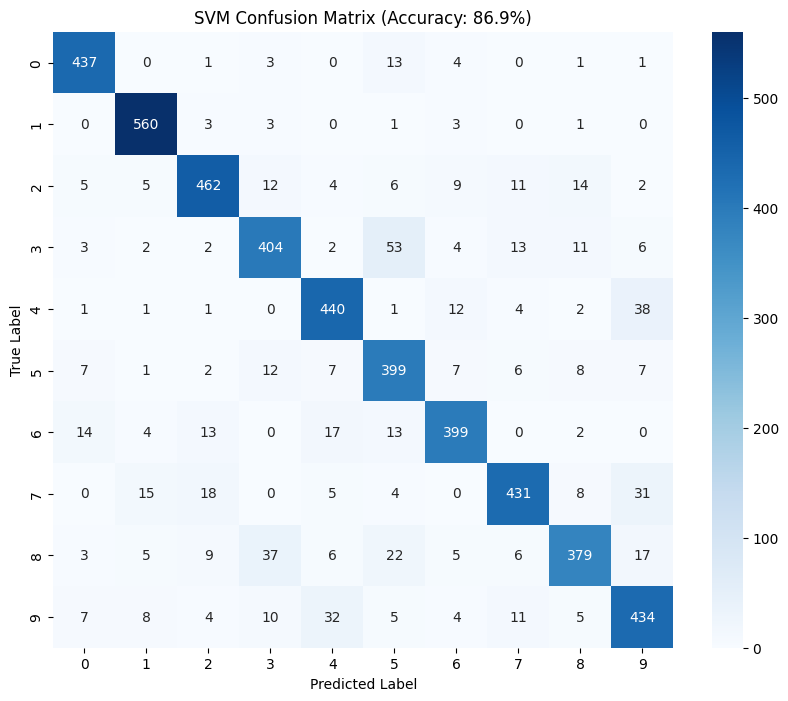


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       460
           1       0.93      0.98      0.96       571
           2       0.90      0.87      0.88       530
           3       0.84      0.81      0.82       500
           4       0.86      0.88      0.87       500
           5       0.77      0.88      0.82       456
           6       0.89      0.86      0.88       462
           7       0.89      0.84      0.87       512
           8       0.88      0.78      0.82       489
           9       0.81      0.83      0.82       520

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Starting Part 3: SVM Classification ---")

# 1. Feature Extraction
# We feed the images into the TRAINED Encoder to get the 64-dimensional "Latent Code"
print("1. Extracting Features from Latent Space...")
x_train_features = encoder.predict(x_train)
x_test_features  = encoder.predict(x_test)

print(f"   Original Image Shape: {x_train.shape} (784 pixels)")
print(f"   Latent Feature Shape: {x_train_features.shape} (64 features)")

# 2. Train SVM
# We use the 'rbf' kernel, which is powerful for finding patterns in these features.
print("2. Training SVM Classifier (this might take 10-20 seconds)...")
svm = SVC(kernel='rbf', C=1.0)

# Ensure labels are 1D arrays (integers)
y_train_labels = y_train.astype(int)
y_test_labels  = y_test.astype(int)

# Fit the SVM on the features (not the raw pixels!)
svm.fit(x_train_features, y_train_labels)

# 3. Evaluation
print("3. Evaluating Performance...")
y_pred = svm.predict(x_test_features)

# Calculate Accuracy
final_accuracy = accuracy_score(y_test_labels, y_pred)
print(f"\n========================================")
print(f" FINAL SVM ACCURACY: {final_accuracy * 100:.2f}%")
print(f"========================================")

# 4. Visualization (Confusion Matrix)
# This shows exactly which digits were confused with which.
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'SVM Confusion Matrix (Accuracy: {final_accuracy*100:.1f}%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5. Detailed Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

# *part 4*

Loading Data...
MNIST Loaded: Train shape (5000, 784), Test shape (5000, 784)

Starting TensorFlow Training...
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 0.2300 - val_loss: 0.2287
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2256 - val_loss: 0.2221
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2104 - val_loss: 0.1919
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 270ms/step - loss: 0.1467 - val_loss: 0.1019
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0840 - val_loss: 0.0745
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0736 - val_loss: 0.0703
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0715 - val_loss: 0.0693
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0707 - val_loss: 0.0685
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0703 - val_loss: 0.0680
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0700 - val_loss: 0.0678
Epoch 11/20
157

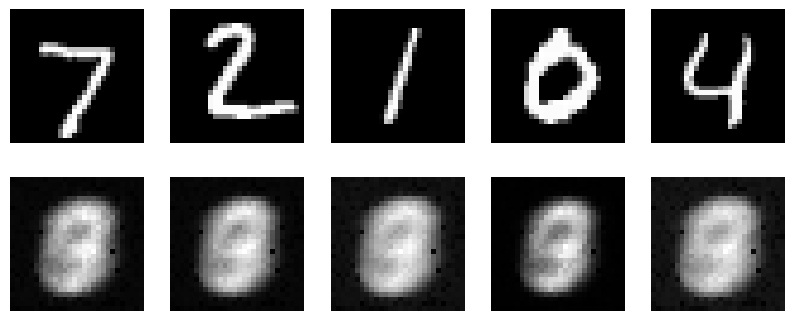

In [5]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from lib.data_loader import load_mnist

# 1. Load the same data
print("Loading Data...")
x_train, y_train, x_test, y_test = load_mnist(limit=5000)

# 2. Define the EXACT same architecture using Keras [cite: 66]
def build_keras_autoencoder():
    # Encoder
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded) # Latent Space

    # Decoder
    decoded = layers.Dense(128, activation='relu')(encoded)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)

    # Model
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

keras_model = build_keras_autoencoder()

# 3. Setup Optimizer and Loss
# We must use the same settings as your custom lib for a fair comparison
# SGD with learning rate 0.1 (or whatever gave you the best results)
opt = optimizers.SGD(learning_rate=0.1) 
keras_model.compile(optimizer=opt, loss='mse')

# 4. Train and Measure Time [cite: 69]
print("\nStarting TensorFlow Training...")
start_time = time.time()

history = keras_model.fit(
    x_train, x_train,
    epochs=20,           # Same epochs as your lib
    batch_size=32,       # Same batch size
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

end_time = time.time()
training_duration = end_time - start_time

# 5. Report Results
final_loss = history.history['loss'][-1]
print(f"\n===================================")
print(f" TensorFlow Results:")
print(f" Training Time: {training_duration:.2f} seconds")
print(f" Final MSE Loss: {final_loss:.5f}")
print(f"===================================")

# 6. Visualization (Optional)
import matplotlib.pyplot as plt
decoded_imgs = keras_model.predict(x_test[:5])

plt.figure(figsize=(10, 4))
for i in range(5):
    # Original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()